<a href="https://colab.research.google.com/github/pr1838341/assign/blob/main/Rondom_forest_assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: hey colab upload data file'

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving glass.csv to glass.csv
User uploaded file "glass.csv" with length 10053 bytes


In [4]:
import pandas as pd
df=pd.read_csv("glass.csv")


In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
df.value_counts()

RI       Na     Mg    Al    Si     K     Ca     Ba    Fe    Type
1.52213  14.21  3.82  0.47  71.77  0.11  9.57   0.00  0.00  1       2
1.51115  17.38  0.00  0.34  75.41  0.00  6.65   0.00  0.00  6       1
1.51848  13.64  3.87  1.27  71.96  0.54  8.32   0.00  0.32  2       1
1.51831  14.39  0.00  1.82  72.86  1.41  6.47   2.88  0.00  7       1
1.51832  13.33  3.34  1.54  72.14  0.56  8.99   0.00  0.00  3       1
                                                                   ..
1.51707  13.48  3.48  1.71  72.52  0.62  7.99   0.00  0.00  2       1
1.51708  13.72  3.68  1.81  72.06  0.64  7.88   0.00  0.00  2       1
1.51709  13.00  3.47  1.79  72.72  0.66  8.18   0.00  0.00  2       1
1.51711  12.89  3.62  1.57  72.96  0.61  8.11   0.00  0.00  2       1
1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24  2       1
Name: count, Length: 213, dtype: int64

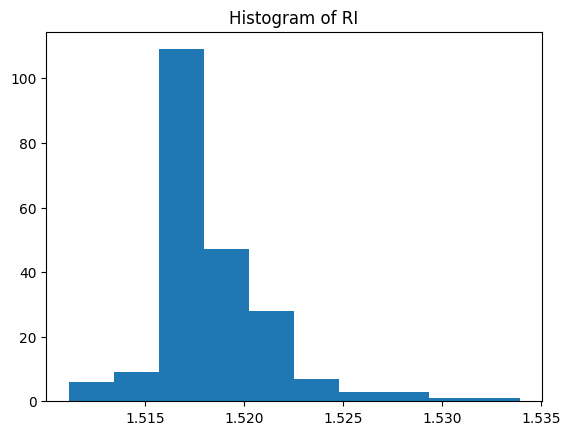

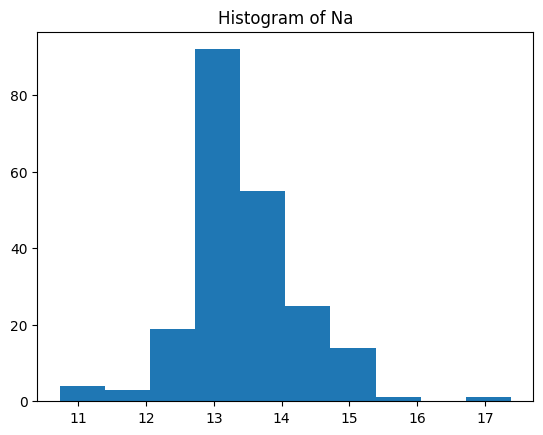

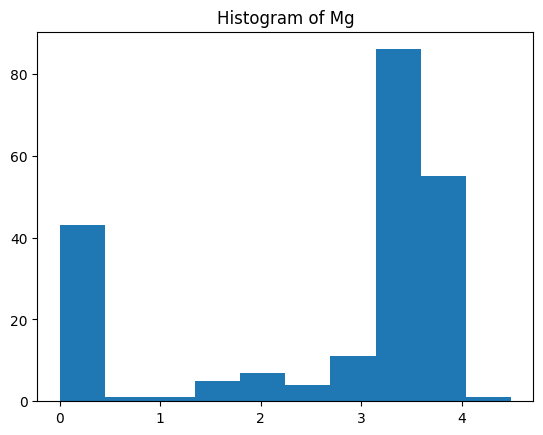

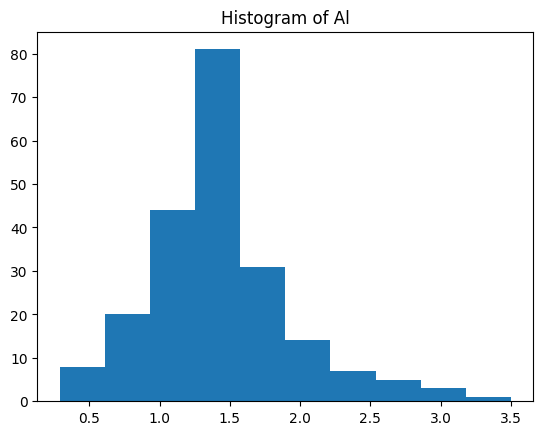

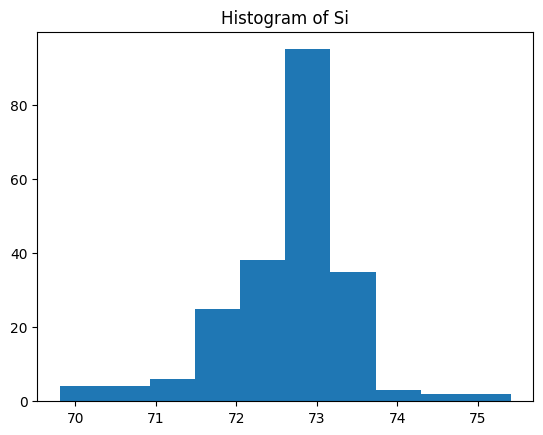

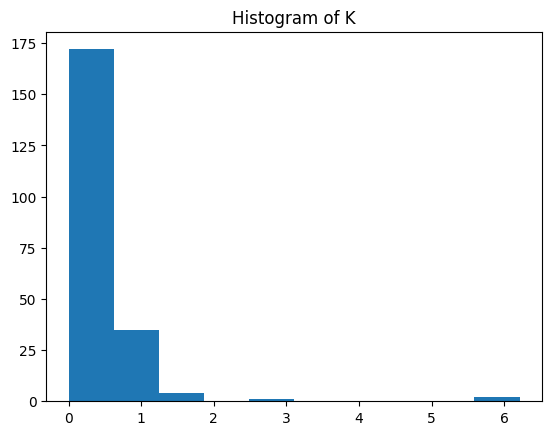

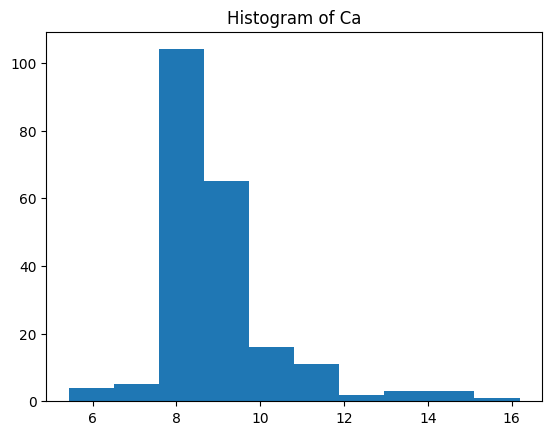

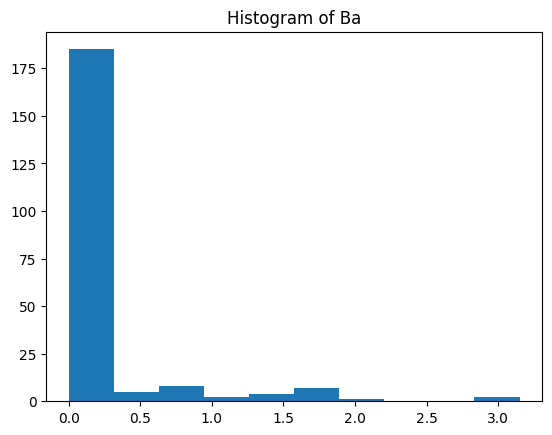

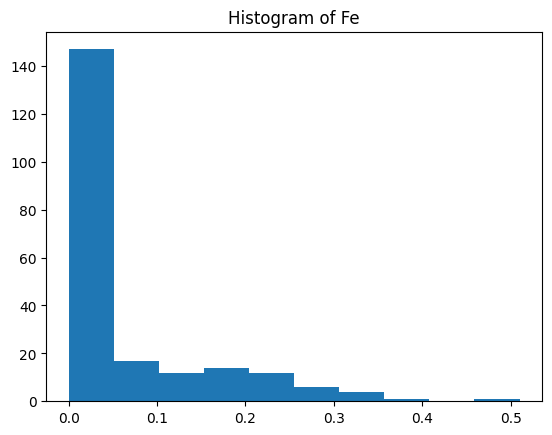

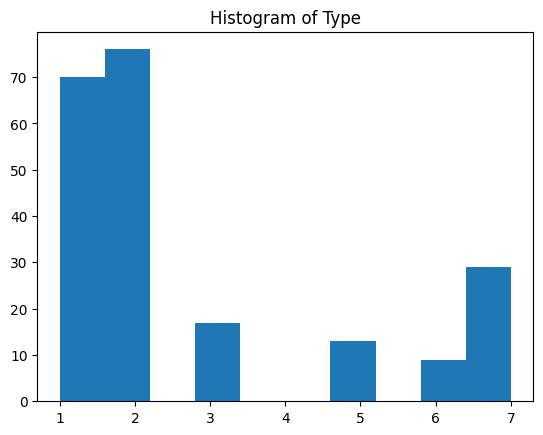

In [8]:


import matplotlib.pyplot as plt

# Iterate through each column in the DataFrame
for col in df.columns:
  # Create a figure
  plt.figure()

  # Plot the histogram of the current column
  plt.hist(df[col], bins=10)

  # Set the title of the plot
  plt.title("Histogram of {}".format(col))

  # Show the plot
  plt.show()


In [30]:


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object'):
  df[col] = le.fit_transform(df[col])

df.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [31]:


# Standardize the data using StandardScaler
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
SS_X = SS.fit_transform(df)

# Convert the scaled data back to a DataFrame
SS_X = pd.DataFrame(SS_X, columns=df.columns)

# Print the first few rows of the scaled data
SS_X.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,-0.848275
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,-0.848275
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,-0.848275
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,-0.848275
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,-0.848275


In [32]:


X = SS_X.drop('Type', axis=1)
Y = SS_X['Type']



In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)


In [35]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable as categorical labels
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

# Fit the Decision Tree model
dt_model = DecisionTreeClassifier(criterion="gini")
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [37]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable as categorical labels
le = LabelEncoder()
Y = le.fit_transform(SS_X['Type'])

In [38]:
Y_test = le.transform(Y_test)

In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(SS_X['Type'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

dt_model = DecisionTreeClassifier(criterion="gini", max_depth=6)
dt_model.fit(X_train, Y_train)

Y_pred_test = dt_model.predict(X_test)




In [42]:
from sklearn.metrics import accuracy_score
# cross validation method --> DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion="gini",max_depth=6)

from sklearn.model_selection import train_test_split

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))



Cross validation Training score:  0.91
Cross validation Test score:  0.67


In [44]:
print("The number of nodes in the tree is:", dt_model.tree_.node_count)
print("The depth of the tree is:", dt_model.tree_.max_depth)


The number of nodes in the tree is: 39
The depth of the tree is: 6


In [47]:
# prompt: above data do the xgb boost and gradient boost and rondom forest also doi it croos valadation

# Import necessary libraries
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(objective="multi:softprob", num_class=6)

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)

# Perform cross-validation for the XGBoost model
xgb_cv_scores = cross_val_score(xgb_model, X, Y, cv=10, scoring="accuracy")

# Perform cross-validation for the Random Forest model
rf_cv_scores = cross_val_score(rf_model, X, Y, cv=10, scoring="accuracy")

# Print the average cross-validation scores
print("Average XGBoost cross-validation score:", xgb_cv_scores.mean())
print("Average Random Forest cross-validation score:", rf_cv_scores.mean())

# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=0)

# Perform cross-validation for the Gradient Boosting model
gb_cv_scores = cross_val_score(gb_model, X, Y, cv=10, scoring="accuracy")

# Print the average cross-validation score
print("Average Gradient Boosting cross-validation score:", gb_cv_scores.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Average XGBoost cross-validation score: 0.7012987012987013
Average Random Forest cross-validation score: 0.7478354978354977


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Average Gradient Boosting cross-validation score: 0.70995670995671


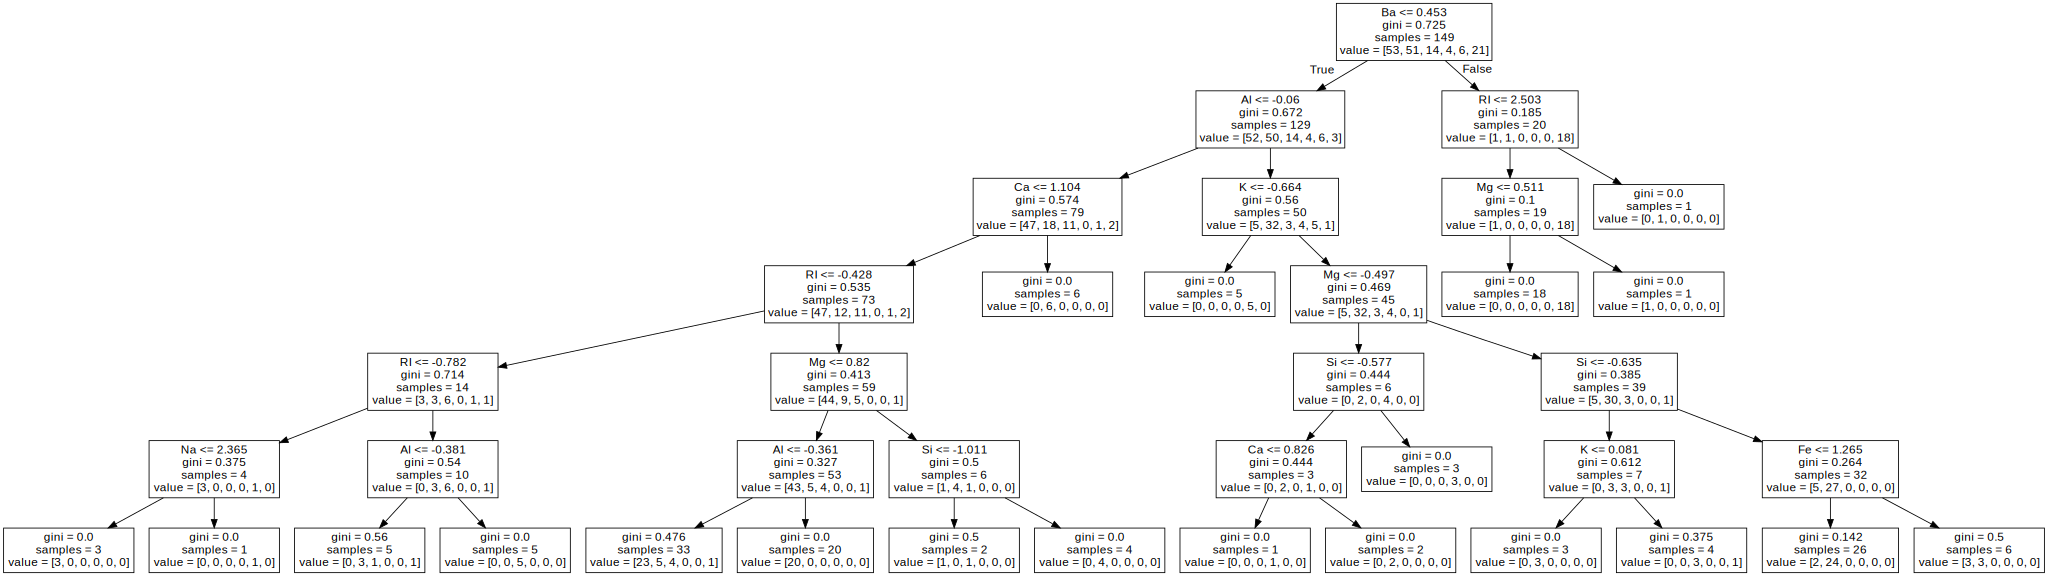

In [49]:
# prompt: print the decision tree graph


from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt_model, out_file=None, feature_names=X.columns)
graph = graphviz.Source(dot_data)
graph
